In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

port alfred za
kapaa us
komsomolskiy ru
ushuaia ar
izberbash ru
cherskiy ru
chuy uy
punta arenas cl
umzimvubu za
havoysund no
kayes ml
kapaa us
punta arenas cl
tilichiki ru
swan hill au
arraial do cabo br
sentyabrskiy ru
dikson ru
margate za
dikson ru
talnakh ru
aden ye
mataura pf
sorong id
novouzensk ru
japura br
ribeira grande pt
togur ru
georgetown sh
albany au
tiksi ru
kaitangata nz
otane nz
tuktoyaktuk ca
tessalit ml
saskylakh ru
kupang id
mataura pf
severo-kurilsk ru
cherskiy ru
male mv
osa ru
fershampenuaz ru
illoqqortoormiut gl
tasiilaq gl
arbore ro
new norfolk au
saldanha za
albany au
gat ly
kodiak us
ushuaia ar
namatanai pg
okhotsk ru
kasamwa tz
kapaa us
thompson ca
hobart au
otradnoye ru
nikolskoye ru
hermanus za
puri in
khatanga ru
nanortalik gl
rikitea pf
lebu cl
grand centre ca
attawapiskat ca
darhan mn
mumford gh
iquitos pe
rikitea pf
hilo us
fujin cn
narsaq gl
rikitea pf
atuona pf
deputatskiy ru
valverde del camino es
tuktoyaktuk ca
bredasdorp za
avera pf
grand river so

pacific grove us
albany au
busselton au
rikitea pf
rikitea pf
busselton au
rawson ar
phangnga th
tasiilaq gl
port alfred za
ancud cl
punta arenas cl
iqaluit ca
grootfontein na
antofagasta cl
lorengau pg
lincoln ar
belushya guba ru
bluff nz
carnarvon au
albany au
irituia br
namibe ao
amderma ru
san cristobal ec
thompson ca
mataura pf
haines junction ca
bluff nz
longyearbyen sj
taburi ph
rikitea pf
strezhevoy ru
naze jp
khatanga ru
kapaa us
roald no
georgetown sh
ribeira grande pt
vao nc
santo antonio do sudoeste br
punta arenas cl
east london za
berlevag no
grand river south east mu
ponta delgada pt
hermanus za
ponta do sol cv
albany au
shchelyayur ru
codrington ag
vaitupu wf
bluff nz
roma au
beringovskiy ru
chokurdakh ru
kodiak us
pelym ru
namatanai pg
bluff nz
ijaki ki
kavieng pg
ushuaia ar
puerto ayora ec
yellowknife ca
mys shmidta ru
margate za
bethel us
kieta pg
lebu cl
flin flon ca
rikitea pf
nizhniy tsasuchey ru
maloshuyka ru
port augusta au
vaini to
sioux lookout ca
taolanaro mg

ushuaia ar
atuona pf
marawi sd
ushuaia ar
tecoh mx
panguna pg
avarua ck
snyder us
mataura pf
hervey bay au
naze jp
rikitea pf
bandar-e lengeh ir
mys shmidta ru
zafra es
cockburn town tc
point fortin tt
pangnirtung ca
prince rupert ca
mataura pf
port alfred za
buluang ph
vaini to
taltal cl
puerto ayora ec
upernavik gl
vaini to
tiarei pf
tuktoyaktuk ca
hermanus za
albany au
eskasem af
moose factory ca
bluff nz
nabari jp
kamenka ru
davenda ru
hambantota lk
mataura pf
lorengau pg
mogadishu so
maceio br
ushuaia ar
nanortalik gl
tsumeb na
zhigalovo ru
rikitea pf
longyearbyen sj
butaritari ki
cape town za
severo-kurilsk ru
faya td
hearst ca
chuy uy
ushuaia ar
kulhudhuffushi mv
taolanaro mg
hervey bay au
miles city us
castro cl
dunedin nz
iquique cl
lolua tv
albany au
souillac mu
ushuaia ar
ushuaia ar
mar del plata ar
barrow us
mahebourg mu
comodoro rivadavia ar
wanlaweyn so
butaritari ki
busselton au
la romana do
pevek ru
lompoc us
busselton au
chunhuhub mx
bathsheba bb
qaanaaq gl
itapemirim 

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Handling API Errors w Try-Except blocks
# ...... if theres an error, we decide what happens next

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | komsomolskiy
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | izberbash
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 1 | havoysund
Processing Record 11 of Set 1 | kayes
Processing Record 12 of Set 1 | tilichiki
Processing Record 13 of Set 1 | swan hill
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | margate
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | aden
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | sorong
Processing Record 22 of Set

Processing Record 40 of Set 4 | zhigansk
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | kalabo
Processing Record 44 of Set 4 | kandrian
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | iqaluit
Processing Record 47 of Set 4 | buraydah
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | bandarbeyla
Processing Record 50 of Set 4 | marsh harbour
Processing Record 1 of Set 5 | taicheng
Processing Record 2 of Set 5 | vicuna
Processing Record 3 of Set 5 | parchim
Processing Record 4 of Set 5 | bom jesus da lapa
Processing Record 5 of Set 5 | bantou
Processing Record 6 of Set 5 | brownsville
Processing Record 7 of Set 5 | hambantota
Processing Record 8 of Set 5 | taoudenni
Processing Record 9 of Set 5 | longyearbyen
Processing Record 10 of Set 5 | haines junction
Processing Record 11 of Set 5 | maceio
Processing Record 12 of Set 5 | torrington
Proce

Processing Record 27 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 28 of Set 8 | codrington
Processing Record 29 of Set 8 | roma
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | pelym
Processing Record 32 of Set 8 | ijaki
City not found. Skipping...
Processing Record 33 of Set 8 | kavieng
Processing Record 34 of Set 8 | bethel
Processing Record 35 of Set 8 | kieta
Processing Record 36 of Set 8 | flin flon
Processing Record 37 of Set 8 | nizhniy tsasuchey
Processing Record 38 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 39 of Set 8 | port augusta
Processing Record 40 of Set 8 | sioux lookout
Processing Record 41 of Set 8 | debre birhan
Processing Record 42 of Set 8 | virginia beach
Processing Record 43 of Set 8 | garissa
Processing Record 44 of Set 8 | cabo rojo
Processing Record 45 of Set 8 | ust-nera
Processing Record 46 of Set 8 | nelson bay
Processing Record 47 of Set 8 | adrar
Processing Record 48 of Set 8 | 

Processing Record 14 of Set 12 | candolim
Processing Record 15 of Set 12 | hit
Processing Record 16 of Set 12 | adre
Processing Record 17 of Set 12 | praia
Processing Record 18 of Set 12 | richards bay
Processing Record 19 of Set 12 | hamilton
Processing Record 20 of Set 12 | san nicolas
Processing Record 21 of Set 12 | nhamunda
Processing Record 22 of Set 12 | half moon bay
Processing Record 23 of Set 12 | mackay
Processing Record 24 of Set 12 | kikwit
Processing Record 25 of Set 12 | banswada
Processing Record 26 of Set 12 | valparaiso
Processing Record 27 of Set 12 | norman wells
Processing Record 28 of Set 12 | manyana
Processing Record 29 of Set 12 | port hueneme
Processing Record 30 of Set 12 | yumen
Processing Record 31 of Set 12 | carbondale
Processing Record 32 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 33 of Set 12 | belmonte
Processing Record 34 of Set 12 | tecoh
Processing Record 35 of Set 12 | panguna
Processing Record 36 of Set 12 | snyder
Process

In [13]:
# Create a DataFrame of city weather data

In [14]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [15]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2021-07-24 15:41:37,37.1041,-113.5841,89.35,51,1,1.01
1,Castro,BR,2021-07-24 15:41:38,-24.7911,-50.0119,70.88,39,0,7.52
2,Barmer,IN,2021-07-24 15:41:38,25.7500,71.3833,91.15,53,97,18.16
3,Rikitea,PF,2021-07-24 15:41:38,-23.1203,-134.9692,68.70,55,0,2.98
4,Whangarei,NZ,2021-07-24 15:41:39,-35.7317,174.3239,53.49,94,76,6.38


In [89]:
city_data_df.dtypes

City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [20]:
# Create the output file (CSV).
output_data_file = "Weather Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") # will export the DataFrame to a CSV file

In [21]:
# create plots for the Data

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

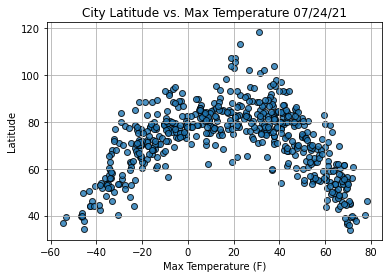

In [28]:
# Import the Time Module
import time

# build plot of Lat v max temp
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)

plt.savefig("Weather Data/Fig1.png")
plt.show()

In [29]:
# create a scatter plot of latitude v humidity

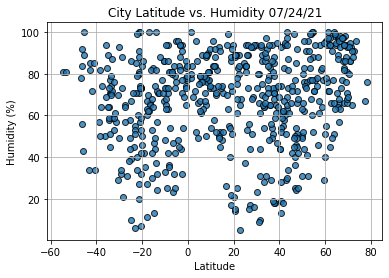

In [30]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig2.png")
# Show plot.
plt.show()

In [31]:
# plot latitude v cloudiness

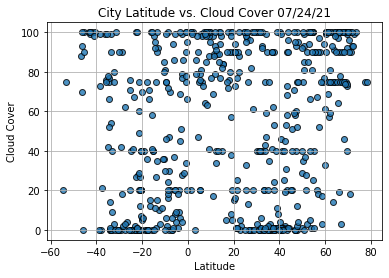

In [32]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloud Cover "+ time.strftime("%x"))
plt.ylabel("Cloud Cover")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig3.png")
# Show plot.
plt.show()

In [33]:
# plot lat v wind speed

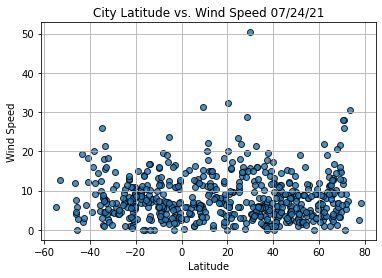

In [34]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# LINEAR REGRESSION is used to find a relationship between the dependent variable and the independent variable(s)

In [37]:
# plotting data is the first step in visualizing if there may be a relationship between variables

In [38]:
# FOR SCATTER PLOTS:  independent variable Latitude,, dependent variable (temp, clouds, humidity, etc.)

In [39]:
# use a correlation coefficient 'r-value' to determine how closely related out fitted line and the data are

In [40]:
# a r-value close to 1 signifies a strong positive correlation

In [42]:
# a r-val close to -1 signifies a strong negative correlation   (correlation close to 0 signals no correlation)

In [43]:
# create a linear regression Function

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
# ^^^ no output until we define the 5 paremeters

# the 5 parameters are: x vals, y vals, title, y label, text coords.

In [50]:
# create a hemisphere DataFrame from city_data_df

In [51]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
573     True
574     True
575     True
576     True
577     True
Name: Lat, Length: 578, dtype: bool

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2021-07-24 15:41:37,37.1041,-113.5841,89.35,51,1,1.01
2,Barmer,IN,2021-07-24 15:41:38,25.7500,71.3833,91.15,53,97,18.16
5,Hambantota,LK,2021-07-24 15:40:20,6.1241,81.1185,79.14,89,75,5.75
7,Hami,CN,2021-07-24 15:40:39,42.8000,93.4500,92.55,29,31,8.86
8,Pangnirtung,CA,2021-07-24 15:41:39,66.1451,-65.7125,48.20,66,90,6.91


In [54]:
#. ^^^ all instances where w latitudes in the northern hemisphere in our data

In [56]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]  # >= vs. < cutoff subjective 
                                                                # could add equator df,, but not necessary

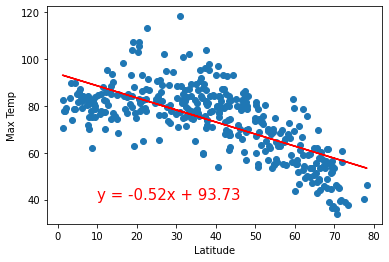

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

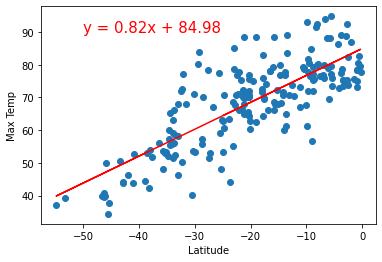

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Sourthern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [63]:
# continues Lin. Regression scatter plots

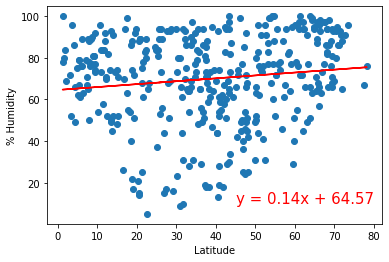

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

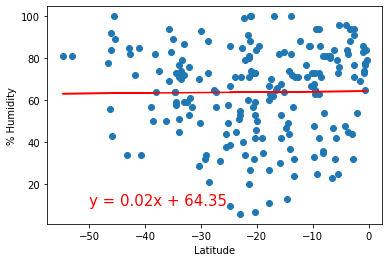

In [71]:
# Linear regression on the o. Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(-50,10))

In [72]:
# Cloud Cover

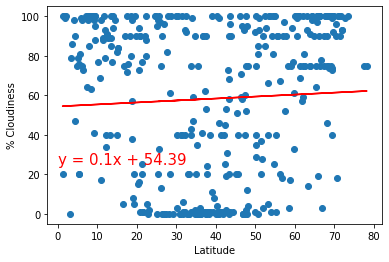

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,25))

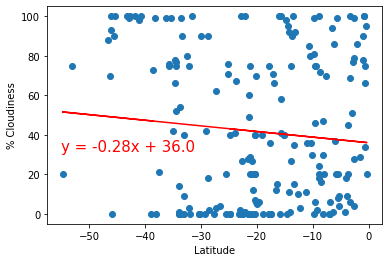

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,32))

In [83]:
# Wind Speed

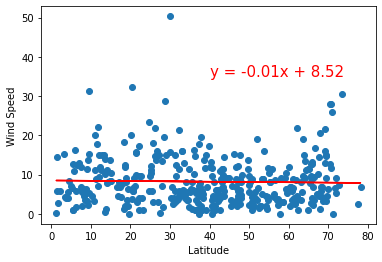

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

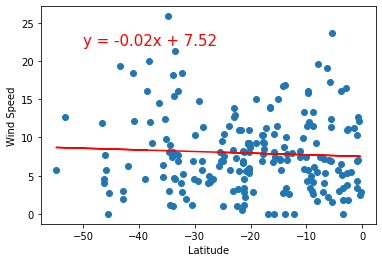

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,22))